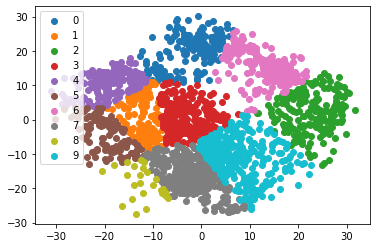

In [1]:
#Loading the required modules

import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data to (x, y)
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [2]:
import pandas as pd

data = pd.read_csv(r'data.csv') 
print(data)    



   5.9  6.2
0  4.6  2.9
1  6.2  2.8
2  4.7  3.2
3  5.0  3.0
4  5.5  4.2
5  4.9  3.0
6  6.7  3.1
7  5.1  3.1
8  6.0  3.0


In [9]:
cluster_centers=[]
d=4
cluster_centers += [random.choice([(2.9,3.2),(4,3)])]
cluster_centers

[(2.9, 3.2)]

In [3]:
import random
import math

#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)


    
#K-Means Algorithm
def kmeans(k,datapoints):

    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 
    
    #Limit our iterations
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers += [random.choice(datapoints)]
        
        
        #Sometimes The Random points are chosen poorly and so there ends up being empty clusters
        #In this particular implementation we want to force K exact clusters.
        #To take this feature off, simply take away "force_recalculation" from the while conditional.
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    print ("Forced Recalculation...")
                    
            
            cluster_centers[k] = new_center
    
        
    print ("======== Results ========")
    print ("Clusters", cluster_centers)
    print ("Iterations",i)
    print ("Assignments", cluster)
    
    
#TESTING THE PROGRAM#
if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    #Feel free to change to whatever size tuples you want...
    datapoints = [(5.9, 3.2), (4.6, 2.9), (6.2, 2.8), (4.7, 3.2), (5.5, 4.2), (5, 3), (4.9, 3.1), (6.7, 3.1), (5.1, 3.5), (6, 3)]

    k = 3 # K - Number of Clusters
      
    kmeans(k,datapoints) 

Forced Recalculation...
Forced Recalculation...
======== Results ========
Clusters [[5.0, 3.1999999999999997], [6.0600000000000005, 3.2599999999999993], [4.65, 3.05]]
Iterations 5
Assignments [1, 2, 1, 2, 1, 0, 0, 1, 0, 1]
